In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

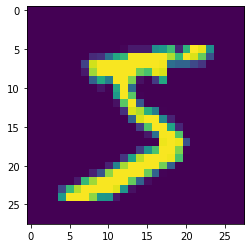

In [4]:
plt.imshow(X_train[0])

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9 ,10])
print(a)
b = a[a%2 == 0]
print('b is: ', b)

[ 1  2  3  4  5  6  7  8  9 10]
b is:  [ 2  4  6  8 10]


In [16]:
only_zeros = X_train[y_train == 0]

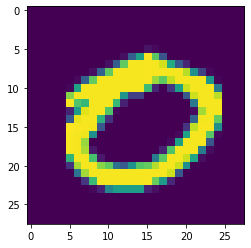

In [19]:
plt.imshow(only_zeros[14])

In [24]:
discriminator = Sequential()
discriminator = Sequential(Flatten(input_shape=[28, 28]))
discriminator.add(Dense(300, 'relu'))
discriminator.add(Dense(150, 'relu'))
discriminator.add(Dense(75, 'relu'))
discriminator.add(Dense(1, 'sigmoid'))

discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# 100 -> 150 -> 784
codings_size = 100

generator = Sequential()
generator.add(Dense(100, activation='relu', input_shape=[100]))
generator.add(Dense(150, activation='relu'))
generator.add(Dense(300, activation='relu'))
generator.add(Dense(784, activation='relu'))
generator.add(Reshape([28, 28]))

In [26]:
GAN = Sequential([generator, discriminator])

In [ ]:
discriminator.trainable = False

In [27]:
GAN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
GAN.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_8 (Sequential)    (None, 28, 28)            306534    
_________________________________________________________________
sequential_7 (Sequential)    (None, 1)                 292051    
Total params: 598,585
Trainable params: 306,534
Non-trainable params: 292,051
_________________________________________________________________


In [30]:
batch_size = 32

In [31]:
mydata = only_zeros

In [33]:
dataset = tf.data.Dataset.from_tensor_slices(mydata).shuffle(buffer_size=1000)

In [34]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [35]:
dataset = dataset.batch(batch_size, drop_remainder=True)

In [38]:
GAN.fit(dataset, epochs=10)

<BatchDataset shapes: (32, 28, 28), types: tf.uint8>